In [1]:
#importing pandas module

import pandas as pd
import numpy as np

In [2]:
#making the data frame

df = pd.read_csv('mosquito_data.csv')
df.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


### Part 1

<u>Question 1: What is the shape of the dataframe?<u>

In [3]:
# dataframe.shape
df.shape

(18495, 13)

Shape: 18,495 rows and 13 columns

<u>Question 2: Convert the Date column to a datetime format<u>

In [4]:
#Find out the data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


Date column is an object

In [5]:
# Date column being converted from object to datetime
df['Date'] = pd.to_datetime(df['Date']) 

In [6]:
df['Date']

0       2019-09-26 00:09:00
1       2019-09-26 00:09:00
2       2019-09-26 00:09:00
3       2019-09-26 00:09:00
4       2019-09-26 00:09:00
                ...        
18490   2016-09-09 00:09:00
18491   2007-08-24 00:08:00
18492   2016-07-27 00:07:00
18493   2017-08-17 00:08:00
18494   2015-08-20 00:08:00
Name: Date, Length: 18495, dtype: datetime64[ns]

Date column is now converted to a datetime format

<u>Question 3: Pick two numeric and two categorical columns: 
What data they are storing? How are they distributed?<u>

In [7]:
#The Year column stores data gathered from the years that were observed.
df['Year'].describe()

count    18495.000000
mean      2012.905812
std          3.725857
min       2007.000000
25%       2010.000000
50%       2013.000000
75%       2016.000000
max       2019.000000
Name: Year, dtype: float64

The years range from 2007 to 2019

In [8]:
#Mosquito number column stores the amount of mosquitoes caught at a time 
df['Mosquito number'].describe()

count    18495.000000
mean        10.879913
std         13.475066
min          1.000000
25%          2.000000
50%          5.000000
75%         14.000000
max         50.000000
Name: Mosquito number, dtype: float64

The amount of mosquitos caught at a time ranged from 1 - 50 with average amount being around 10.

In [9]:
#The trap type column distributes the amount of instances mosquitos were caught in each trap.
df['Trap type'].value_counts()

GRAVID      17741
CDC           544
SENTINEL      209
OVI             1
Name: Trap type, dtype: int64

There are 4 different types of traps. This data shares the amount of instances mosquitos were caught per trap type

In [10]:
#Thie species column distributes the amount of instances mosquitos were caught per species.
df['Species'].value_counts()

CULEX RESTUANS      11866
CULEX PIPIENS        5486
CULEX TERRITANS       917
CULEX SALINARIUS      226
Name: Species, dtype: int64

There are 4 different types of species. 

<u>Question 4 - Are there any columns that contain duplicate information? If so, remove the redundant columns.<u>

In [11]:
#I dropped Week, Block and Mosquito ID columns which are the 1st, 3rd and 8th index
drop_columns = df.drop(df.columns[[1, 3, 8]], axis=1)
drop_columns.head()

#Week is not necessary since we already know the date, we can figure out the week of year from knowing that
#Block column just repeats the block number that is already provided in the Address Block column
#Mosquito ID is just the abbreviated name of the Mosquito Species

,Year,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon
0,2019,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,NaN,NaN
1,2019,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049


Week, Block and Mosquito ID columns have been removed

<u>Question 5 - Are there any null values in the dataframe? If so, deal with them appropriately.<u>

In [12]:
#How to determine which columns have null values
null_data = df.columns[df.isna().any()].tolist()
null_data

['Lat', 'Lon']

Lat and Lon are the only columns with null values

In [13]:
#How to determine how many rows have null values
df.isnull().sum()

Year                  0
Week                  0
Address Block         0
Block                 0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
Mosquito ID           0
WNV Present           0
Species               0
Lat                2924
Lon                2924
dtype: int64

In [14]:
#Whenever Lat is null, so is Lon, I filtered to find out which address blocks had null values.
filt = df['Lat'].isna()
df[filt].head(50)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
44,2019,38,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-19 00:09:00,3,Res,negative,CULEX RESTUANS,NaN,NaN
55,2019,38,100XX W OHARE AIRPORT,100,T905,GRAVID,2019-09-19 00:09:00,2,Ter,negative,CULEX TERRITANS,NaN,NaN
57,2019,38,100XX W OHARE AIRPORT,100,T905,GRAVID,2019-09-19 00:09:00,4,Res,negative,CULEX RESTUANS,NaN,NaN
93,2019,37,100XX W OHARE AIRPORT,100,T905,GRAVID,2019-09-12 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
97,2019,37,4XX W 127TH,4,T135,GRAVID,2019-09-12 00:09:00,35,Res,negative,CULEX RESTUANS,NaN,NaN
101,2019,37,100XX W OHARE AIRPORT,100,T901,GRAVID,2019-09-12 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
129,2019,37,100XX W OHARE AIRPORT,100,T912,GRAVID,2019-09-12 00:09:00,3,Res,negative,CULEX RESTUANS,NaN,NaN
130,2019,37,4XX W 127TH,4,T135,GRAVID,2019-09-12 00:09:00,8,Pip,negative,CULEX PIPIENS,NaN,NaN
132,2019,37,100XX W OHARE AIRPORT,100,T905,GRAVID,2019-09-12 00:09:00,1,Ter,negative,CULEX TERRITANS,NaN,NaN


In [ ]:
df.loc[df['Address Block']=='100XX W OHARE', 'Lat'] = '41.978611'

In [15]:
#I google searched the Lat and Lon for the addresses that had null values and inputed those numbers
#so there wouldn't be any more null values.
df.loc[df['Address Block']=='100XX W OHARE', 'Lat'] = '41.978611'
df.loc[df['Address Block']=='100XX W OHARE AIRPORT', 'Lat'] = '41.978611'
df.loc[df['Address Block']=='4XX W 127TH', 'Lat'] = '41.663278'
df.loc[df['Address Block']=='115XX S AVENUE L', 'Lat'] = '41.7027276'
df.loc[df['Address Block']=='81XX S ASHLAND', 'Lat'] = '41.7462889'
df.loc[df['Address Block']=='79XX S CHICAGO', 'Lat'] = '41.739685'
df.loc[df['Address Block']=='98XX S AVENUE G', 'Lat'] = '41.717983'
df.loc[df['Address Block']=='65XX N OAK PARK AVE', 'Lat'] = '41.885033'
df.loc[df['Address Block']=='30XX S HOYNE', 'Lat'] = '41.9370863'
df.loc[df['Address Block']=='43XX N ASHLAND', 'Lat'] = '41.93553'

df.loc[df['Address Block']=='100XX W OHARE', 'Lon'] = '-87.904724'
df.loc[df['Address Block']=='100XX W OHARE AIRPORT', 'Lon'] = '-87.904724'
df.loc[df['Address Block']=='4XX W 127TH', 'Lon'] = '-87.633214'
df.loc[df['Address Block']=='115XX S AVENUE L', 'Lon'] = '-87.5364937'
df.loc[df['Address Block']=='81XX S ASHLAND', 'Lon'] = '-87.6634183'
df.loc[df['Address Block']=='79XX S CHICAGO', 'Lon'] = '-87.554420'
df.loc[df['Address Block']=='98XX S AVENUE G', 'Lon'] = '-87.528458'
df.loc[df['Address Block']=='65XX N OAK PARK AVE', 'Lon'] = '-87.784500'
df.loc[df['Address Block']=='30XX S HOYNE', 'Lon'] = '-87.6805212'
df.loc[df['Address Block']=='43XX N ASHLAND', 'Lon'] = '-87.669712'

df

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.978611,-87.904724
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,3,T043,GRAVID,2016-09-09 00:09:00,4,Pip,positive,CULEX PIPIENS,41.857843,-87.635858
18491,2007,34,46XX N MILWAUKEE AVE,46,T003,GRAVID,2007-08-24 00:08:00,19,Pip,positive,CULEX PIPIENS,41.965376,-87.758403
18492,2016,30,127XX S DOTY AVE,127,T115,GRAVID,2016-07-27 00:07:00,34,Res,positive,CULEX RESTUANS,41.662395,-87.590176
18493,2017,33,20XX N DOMINICK ST,20,T240B,SENTINEL,2017-08-17 00:08:00,50,Res,positive,CULEX RESTUANS,41.919197,-87.664758


All the null values have been replaced.

### Part 2

In [16]:
import matplotlib.pyplot as plt

In [17]:
plt.rcParams['figure.figsize'] = (20, 10) #setting figure size

<u>Question 1: Create a visualization that explores the relationship between mosquito number and date<u>

In [18]:
#Since there are hundreds of different dates, it's easier to graph by year instead
#I decided to calculate the sum of mosquitos caught in each year
results = df.groupby('Year').sum()
results['Mosquito number']

Year
2007    25094
2008     3882
2009     5528
2010     8115
2011     7795
2012    11342
2013    24724
2014    29888
2015    11763
2016    36893
2017    10632
2018    15538
2019    10030
Name: Mosquito number, dtype: int64

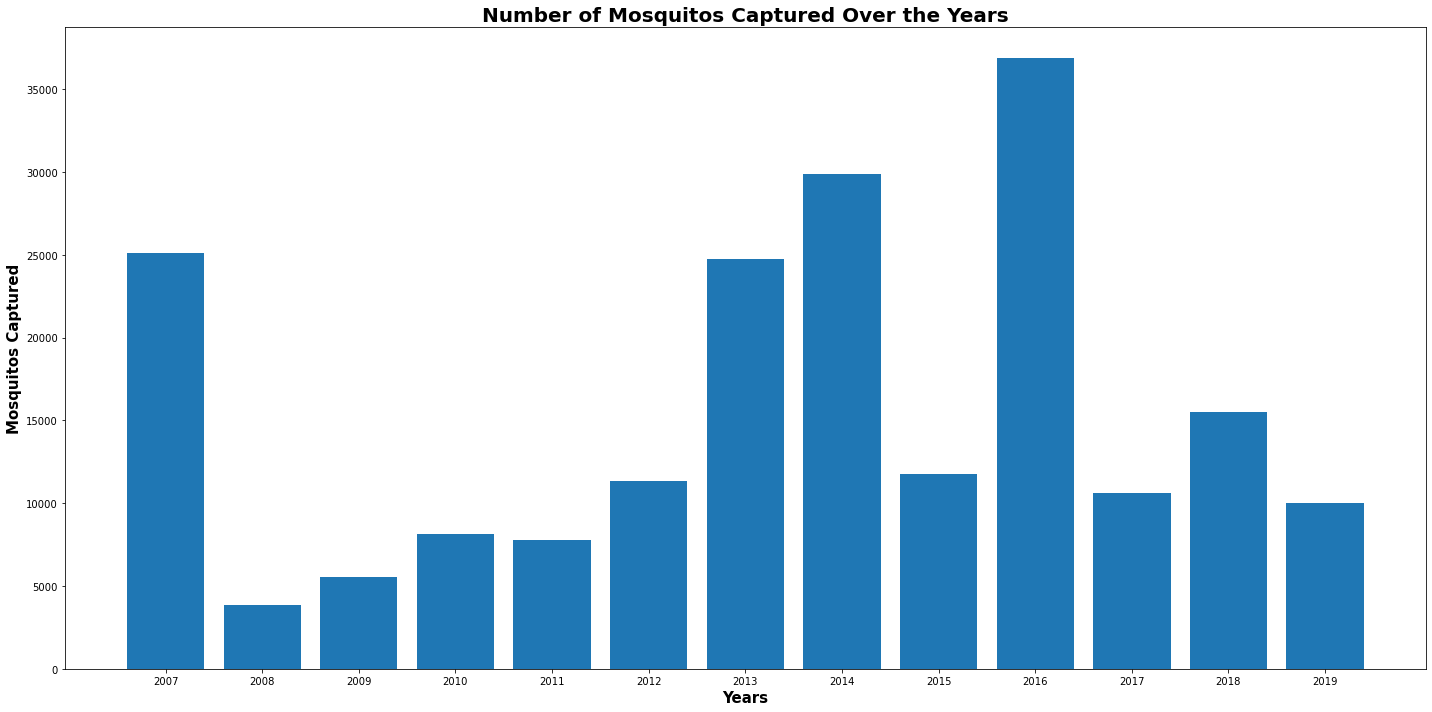

In [19]:
#This graph shows how many mosquitos were captured by year
year = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

plt.figure()
plt.bar(year, results['Mosquito number'])
plt.xlabel('Years', size = 15, fontweight = 'bold')
plt.ylabel('Mosquitos Captured', size = 15, fontweight = 'bold')
plt.title('Number of Mosquitos Captured Over the Years', size = 20, fontweight = 'bold')
plt.xticks(year)
plt.tight_layout()
plt.show()

The most mosquitos were captured in 2016

### Part 3

<u>Question 1: Create a visualization that explores the relationship between mosquito species and WNV prevelance.<u>


In [20]:
#Calculating the sum of mosquitos that were positive and negative per species type
species_sum = pd.crosstab(df['Species'], df['WNV Present'], values=df['Mosquito number'], aggfunc='sum')
species_sum

WNV Present,negative,positive
Species,,
CULEX PIPIENS,30156,31208
CULEX RESTUANS,83562,54024
CULEX SALINARIUS,433,31
CULEX TERRITANS,1776,34


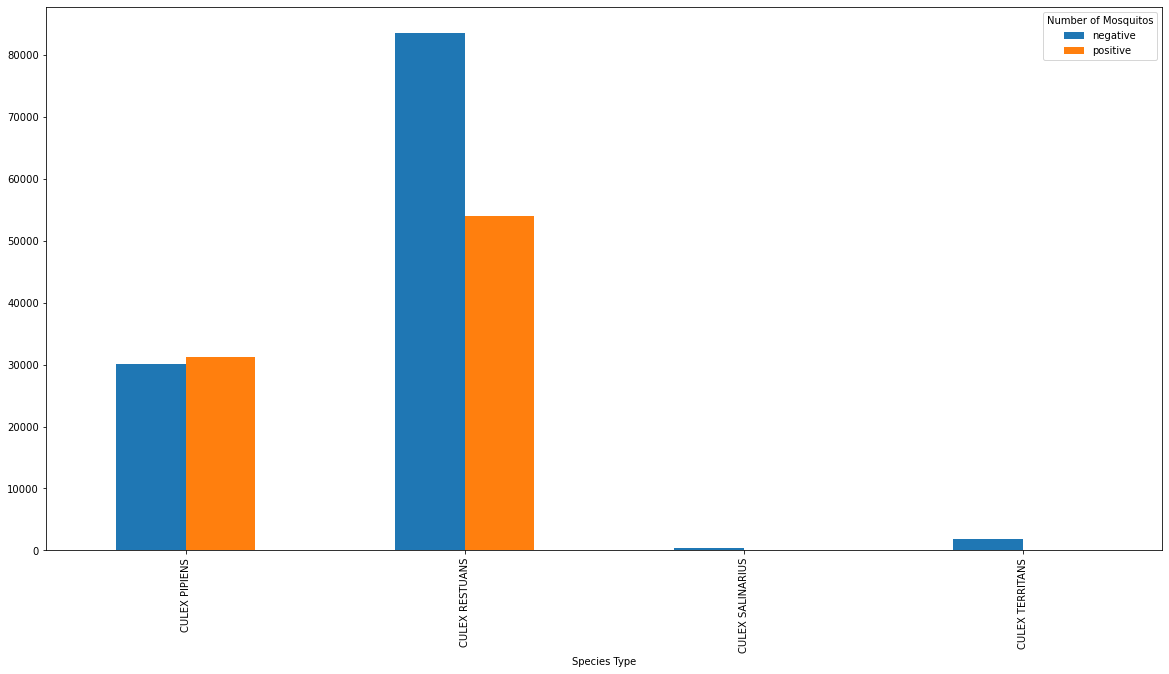

In [21]:
#This bar graph shows the comparison of captured mosquitos that were positive vs negative by species
graph = pd.crosstab(df['Species'], df['WNV Present'],
                    rownames = ['Species Type'], colnames = ['Number of Mosquitos'],
                    values=df['Mosquito number'], aggfunc='sum').plot(kind='bar')

Culex Pipiens was the only species to have more positive than negative results

<u>Question 2: Create a visualization that explores the relationship between mosquitos caught and trap type.<u>

In [22]:
#Discovering the different types of traps
trap_type = df['Trap type'].unique()
print(trap_type)

['GRAVID' 'SENTINEL' 'CDC' 'OVI']


In [23]:
#Counting the amount of mosquitos caught in each trap type
m_trap = df.groupby(['Trap type'])['Mosquito number'].sum().reset_index()
m_trap

,Trap type,Mosquito number
0,CDC,9883
1,GRAVID,186206
2,OVI,1
3,SENTINEL,5134


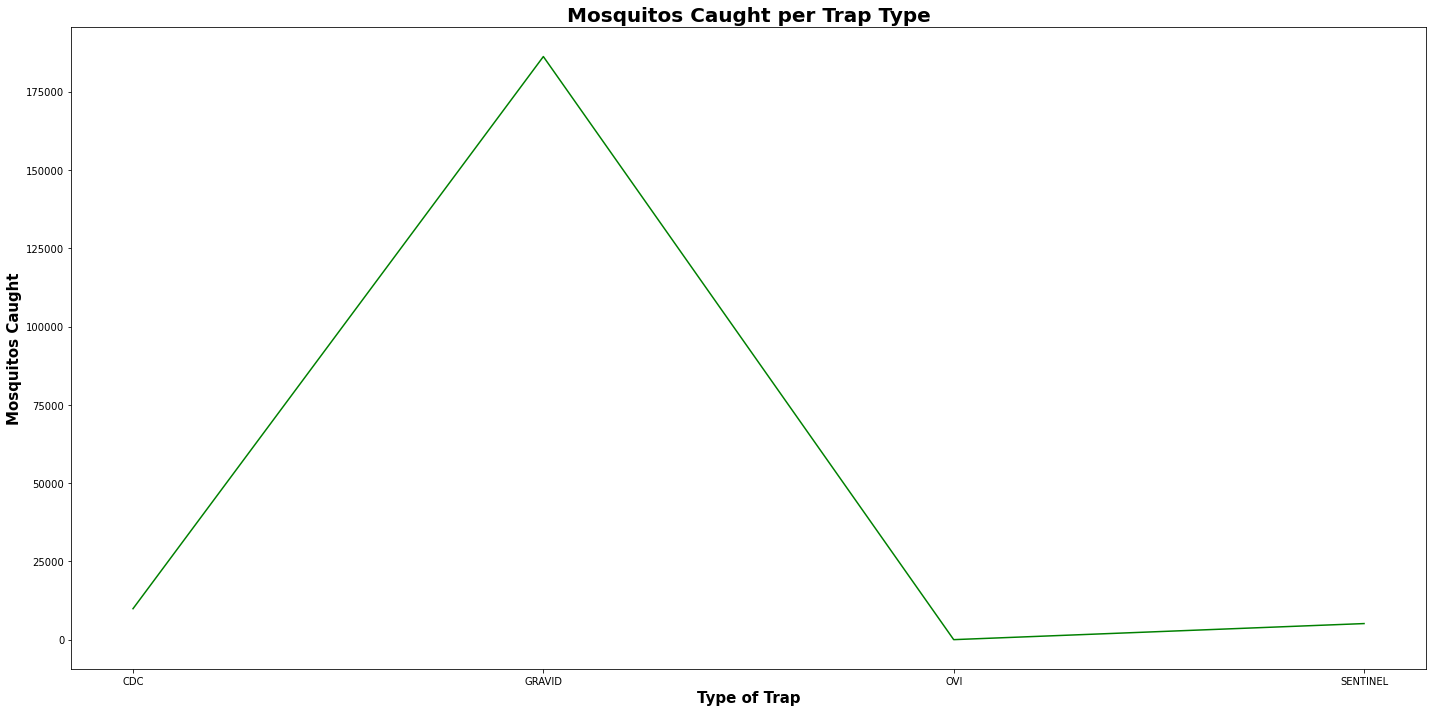

In [24]:
#This line graph shows how many mosquitos were caught per trap type
plt.figure()
plt.plot(m_trap['Trap type'], m_trap['Mosquito number'], color = 'green')
plt.xlabel('Type of Trap', size = 15, fontweight = 'bold')
plt.ylabel('Mosquitos Caught', size = 15, fontweight = 'bold')
plt.title('Mosquitos Caught per Trap Type', size = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

Gravid trap caught the most mosquitos followed, by CDC, Sentinel and OVI in order.

<u>Question 3: Insight of my choice<u>

In [25]:
#Comparing the relationship of mosquitos caught and the mosquito ID using a Pie chart.

Even though I decided mosquito ID was a redundant column that I dropped on question 1.4,
I wanted to find out what percentage of mosquitos 
caught were in each species and since mosquito ID provides an abbreviation of mosquito species
I thought it would make labeling a pie chart easier to read.

In [26]:
#Discovering the different types of mosquito IDs
m_id = df['Mosquito ID'].unique()
print(m_id)

['Res' 'Ter' 'Sal' 'Pip']


In [27]:
#Calculating the sum of mosquitos in each ID type
m_num = df.groupby(['Mosquito ID'])['Mosquito number'].sum().reset_index()
m_num

,Mosquito ID,Mosquito number
0,Pip,61364
1,Res,137586
2,Sal,464
3,Ter,1810


In [28]:
#Creating colors for my pie chart
colors = ['yellow', 'green', 'pink', 'orange']

In [29]:
#Command to ensure the labels of the mosquito IDs will be presented
label = m_num['Mosquito ID'].value_counts().index

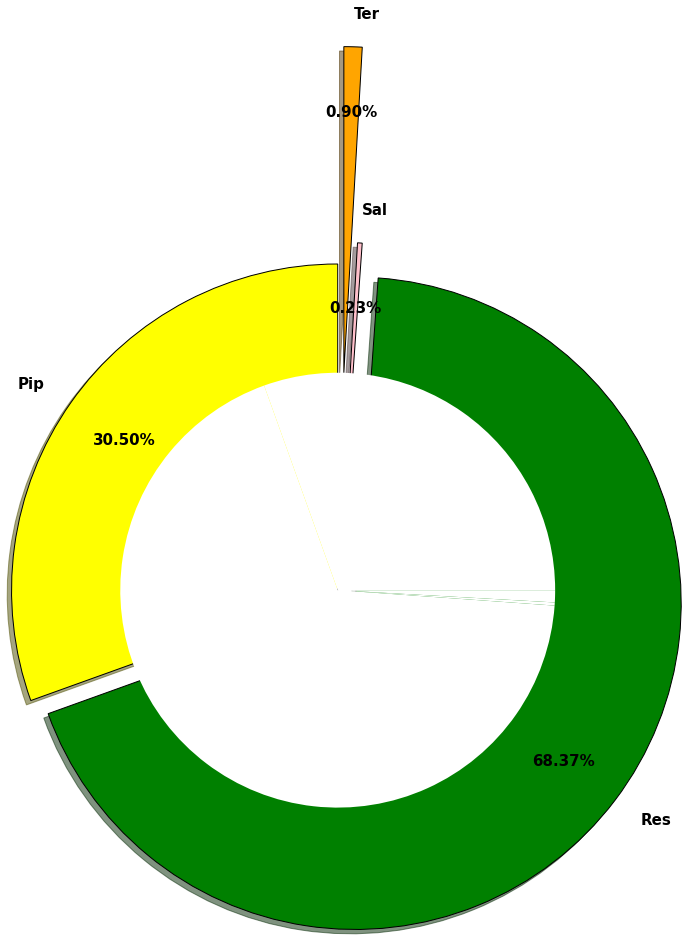

In [30]:
#Pie chart of the data comparisons
plt.pie(m_num['Mosquito number'], labels = label, 
        autopct = '%1.2f%%',
        colors = colors[:4],
        wedgeprops = {'edgecolor': 'k'},
        textprops = {'fontweight': 'bold', 'size':15},
        shadow = True,
        startangle = 90,
        explode = [0, 0.1, 0.1, 1],
        pctdistance = 0.8,
        radius = 1.5)

plt.pie(m_num['Mosquito number'], colors = ['white'])
plt.show()

Res mosquito was the most prevelant, followed up Pip, Ter and Sal in that order.